In [3]:
#
# data preprocessing
#
import numpy as np


In [4]:

fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
               31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
               35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
               10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
               500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
               700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
               7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [5]:
# 데이터를 열로 바꾸고 합치기
fish_data = np.column_stack((fish_length, fish_weight))
fish_data[:5]

array([[ 25.4, 242. ],
       [ 26.3, 290. ],
       [ 26.5, 340. ],
       [ 29. , 363. ],
       [ 29. , 430. ]])

In [7]:
# target label 생성
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
fish_target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [9]:
# train test split
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = \
    train_test_split(
    fish_data,
    fish_target,
    random_state=42)

In [11]:
# 입력 데이터는 2dim
print(train_input.shape, test_input.shape)

(36, 2) (13, 2)


In [13]:
# target 데이터는 1dim
print(train_target.shape, test_target.shape)

(36,) (13,)


In [14]:
# sampling bias check
print(test_target)
# 특정 클래스의 개수가 적기 때문에 편향 발생

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [15]:
# stratify 파라미터 조정
train_input, test_input, train_target, test_target = \
    train_test_split(
    fish_data,
    fish_target,
    stratify=fish_target,
    random_state=42)

In [16]:
# model train, evaluate
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [17]:
# predict
kn.predict([[25, 150]])

array([0.])

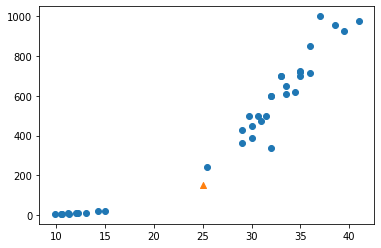

In [19]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')

In [21]:
# kneighbors 메서드 반환값 확인
distance, indexes = kn.kneighbors([[25, 150]])
distance, indexes

(array([[ 92.00086956, 130.48375378, 130.73859415, 138.32150953,
         138.39320793]]),
 array([[21, 33, 19, 30,  1]], dtype=int64))

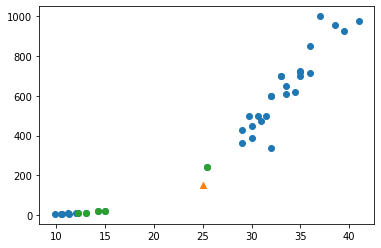

In [22]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1])

In [23]:
# distance 확인 시 x 축은 범위가 좁고, y 축은 넓다.
# 따라서 스케일링 필요 대개 거리기반 알고리즘은 데이터 스케일링이 필요
# z- score scaling

mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

In [24]:
# 브로드캐스팅
train_scaled = (train_input - mean) / std

In [25]:
# 예측할 데이터도 스케일링
new_data = ([25, 150] - mean) / std

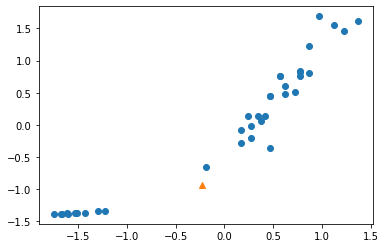

In [26]:
# scatter plot
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new_data[0], new_data[1], marker='^')

In [27]:
# model train
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [28]:
# test_input scaling
test_scaled = (test_input - mean) / std

In [29]:
# model evaluate
kn.score(test_scaled, test_target)

1.0

In [34]:
# model predict
kn.predict(new_data.reshape(1, -1))

array([1.])

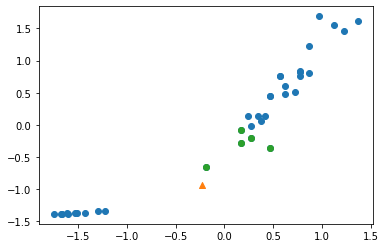

In [36]:
# scatter plot
distance, indexes = kn.kneighbors([new_data])
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new_data[0], new_data[1], marker='^')
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1])